# Beta分布

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats

In [2]:
src = cv2.cvtColor(cv2.imread('../../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [3]:
def noise_beta(M,N,a=1,b=1):
    dst = np.zeros((M,N),dtype=np.float64)
    
    def gam(z):
        umax = 10
        T = 0
        for i in range(umax):
            T = T + i ** (z - 1) * np.exp(-i)
        return T
    eps = 1.0e-5
    for i in range(M):
        for j in range(N):
            x = np.random.rand()
            dst[i,j] = gam((a+b)) / (gam(a) * gam(b) + eps) * \
                    ((1 - x) ** (b - 1)) * (x ** (a - 1))
    return dst

In [4]:
noise = noise_beta(src.shape[0],src.shape[1],5,2)
# print(noise)


In [5]:
src_noise = np.zeros_like(src)
noise_uint8 = cv2.convertScaleAbs(noise * 255)
src_noise[:,:,0] = src[:,:,0] + noise_uint8
src_noise[:,:,1] = src[:,:,1] + noise_uint8
src_noise[:,:,2] = src[:,:,2] + noise_uint8

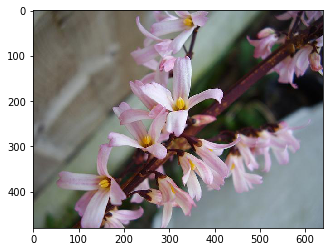

In [6]:
plt.imshow(src)

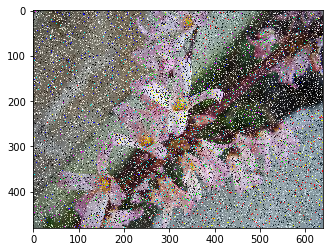

In [7]:
plt.imshow(src_noise)

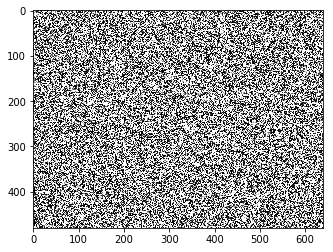

In [8]:
plt.imshow(noise_uint8,'gray')